### Analysis of User Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sb

In [2]:
openCloseData = pd.read_csv('openCloseData-34col.csv')
print(openCloseData.shape)

(159996, 35)


In [3]:
openCloseData.columns

Index(['Unnamed: 0', 'PostId', 'UserId', 'Comment', 'Body', 'Title', 'Tags',
       'Reputation', 'experienceInTime', 'WebsiteUrl', 'Location', 'AboutMe',
       'Views', 'Upvotes', 'Downvotes', 'ProfileImageUrl', 'tagCount',
       'closed', 'lowerUpperRatio', 'sentenceCount', 'firstLineLength',
       'codeLength', 'urlCount', 'SOUrlCount', 'titleLengthInChars',
       'countOfInterrogativeSent', 'sentencesStartWithYouCount',
       'sentencesStartWithICount', 'shortWordCount', 'bodyWordCount',
       'punctuationCount', 'websiteUrlFilled', 'locationFilled',
       'aboutMeFilled', 'profileImageUrlFilled'],
      dtype='object')

In [40]:
openData = openCloseData[openCloseData['closed'] == 0]
closeData = openCloseData[openCloseData['closed'] == 1]
print((openData.shape, closeData.shape))
openData.head()

((80000, 35), (79996, 35))


,Unnamed: 0,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled
79996,8287,32203002,5218650,100,<p>Please someone explain complete step by ste...,How to build a kernel in Minix 3?,kernel|minix,6,13,NaN,...,0,0,0,6,17,1,0,0,0,1
79997,34655,22080350,1375553,100,<p>The following JSON is returned from SharePo...,ConvertFrom-Json : Cannot convert the JSON str...,json|rest|powershell,33857,664,http://blog.vgrem.com/,...,1,0,0,560,1520,14,1,1,1,1
79998,1593,28019349,1774679,100,<p>What's the benifit of allocating a chunk of...,Is it faster when access the contiguous physic...,linux|memory-management|linux-kernel|memory-ad...,1470,816,NaN,...,3,0,0,10,26,4,0,1,1,1
79999,76697,32211159,411954,100,<p>I'm using an S3 bucket as the origin or a C...,Possible to force CloudFront to sync with enti...,amazon-web-services|amazon-s3|cdn|amazon-cloud...,10992,1846,NaN,...,1,0,2,35,70,7,0,0,0,0
80000,91724,29798226,4819459,100,<p>I am making a chat app with AngularJs and I...,Add class to newest items that are added into ...,javascript|arrays|angularjs,34,0,NaN,...,2,0,2,143,487,13,0,1,0,1


In [47]:
sorted_open = openData.sort_values(by = 'UserId')

In [48]:
print(sorted_open[['UserId', 'experienceInTime', 'Upvotes', 'Downvotes', 'Views']].head(50))
# only experienceInTime is different even when userId is same

        UserId  experienceInTime  Upvotes  Downvotes  Views
125302      29              2454     5789        179   5163
141755     116              2768     2515         38  17943
151205     199              2753      725          0   1055
82478      199              2370      725          0   1055
96860      234              2445     3809        324   4718
88034      412              2563      276          0     95
99088      536              2378     2759        175   3835
87380      639              2084       43          0     99
116369     658              2197      657         47   9256
122823     658              2197      657         47   9256
125973     742              2118      694         11   1512
136580     775              2223     1318         55    656
109662     905              2509     2827        186   5361
87138      937              2298      689          8    234
140097     945              2035      208         12    333
154403     987              2398     129

In [41]:
openData = openData.drop_duplicates(subset = ['PostId'])
closeData = closeData.drop_duplicates(subset = ['PostId'])
print(openData.shape, closeData.shape)

(79385, 35) (79919, 35)


In [42]:
sorted_open = openData.sort_values(by = 'UserId')
print(sorted_open.head(50))

        Unnamed: 0    PostId  UserId  Comment  \
125302       49232  29772458      29      100   
141755       87697  35714287     116      100   
82478        19076  28213169     199      100   
151205       91860  35429357     199      100   
96860       101561  29637102     234      100   
88034        93308  31955005     412      100   
99088       107852  28415977     536      100   
87380        84936  23226830     639      100   
116369       84489  25294114     658      100   
125973       90124  23892056     742      100   
136580        9415  25753106     775      100   
109662       48222  31020249     905      100   
87138        35130  27127789     937      100   
140097       68215  22240603     945      100   
154403       56642  28900525     987      100   
81537        38574  20970093    1078      100   
107431       54022  22197515    1094      100   
140341       16618  34306199    1185      100   
117409       36983  25615532    1363      100   
124452       70181  

In [43]:
openData.head()

,Unnamed: 0,PostId,UserId,Comment,Body,Title,Tags,Reputation,experienceInTime,WebsiteUrl,...,countOfInterrogativeSent,sentencesStartWithYouCount,sentencesStartWithICount,shortWordCount,bodyWordCount,punctuationCount,websiteUrlFilled,locationFilled,aboutMeFilled,profileImageUrlFilled
79996,8287,32203002,5218650,100,<p>Please someone explain complete step by ste...,How to build a kernel in Minix 3?,kernel|minix,6,13,NaN,...,0,0,0,6,17,1,0,0,0,1
79997,34655,22080350,1375553,100,<p>The following JSON is returned from SharePo...,ConvertFrom-Json : Cannot convert the JSON str...,json|rest|powershell,33857,664,http://blog.vgrem.com/,...,1,0,0,560,1520,14,1,1,1,1
79998,1593,28019349,1774679,100,<p>What's the benifit of allocating a chunk of...,Is it faster when access the contiguous physic...,linux|memory-management|linux-kernel|memory-ad...,1470,816,NaN,...,3,0,0,10,26,4,0,1,1,1
79999,76697,32211159,411954,100,<p>I'm using an S3 bucket as the origin or a C...,Possible to force CloudFront to sync with enti...,amazon-web-services|amazon-s3|cdn|amazon-cloud...,10992,1846,NaN,...,1,0,2,35,70,7,0,0,0,0
80000,91724,29798226,4819459,100,<p>I am making a chat app with AngularJs and I...,Add class to newest items that are added into ...,javascript|arrays|angularjs,34,0,NaN,...,2,0,2,143,487,13,0,1,0,1


### 1. Reputation

In [51]:
# When duplicates were not removed

# max_reputation_o = np.max(openData['Reputation'])
# min_reputation_o = np.min(openData['Reputation'])
# avg_reputation_o = np.mean(openData['Reputation'])
# max_reputation_c = np.max(closeData['Reputation'])
# min_reputation_c = np.min(closeData['Reputation'])
# avg_reputation_c = np.mean(closeData['Reputation'])
# print('Value\t\tOpen\t\tClose')
# print('Maximum\t\t' + str(max_reputation_o) + '\t\t' + str(max_reputation_c))
# print('Minimum\t\t' + str(min_reputation_o) + '\t\t' + str(min_reputation_c))
# print('Average\t\t' + str(avg_reputation_o) + '\t' + str(avg_reputation_c))
# print('Mode\t\t' + str(stat.mode(openData['Reputation'])) + '\t\t' + str(stat.mode(closeData['Reputation'])))
# print('Median\t\t' + str(stat.median(openData['Reputation'])) + '\t\t' + str(stat.median(closeData['Reputation'])))

# Value		Open		Close
# Maximum		670141		678046
# Minimum		1		1
# Average		1680.9328875	2355.232299114956
# Mode		1		1
# Median		157.0		93.0


In [44]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(openData['Reputation'])) + '\t\t\t' + str(max(closeData['Reputation'])))
print('Minimum\t\t' + str(min(openData['Reputation'])) + '\t\t\t' + str(min(closeData['Reputation'])))
print('Average\t\t' + str(np.mean(openData['Reputation'])) + '\t' + str(np.mean(closeData['Reputation'])))
print('Mode\t\t' + str(stat.mode(openData['Reputation'])) + '\t\t\t' + str(stat.mode(closeData['Reputation'])))
print('Median\t\t' + str(stat.median(openData['Reputation'])) + '\t\t\t' + str(stat.median(closeData['Reputation'])))

Value		Open			Close
Maximum		670141			678046
Minimum		1			1
Average		1681.7189519430624	2343.262278056532
Mode		1			1
Median		157			93


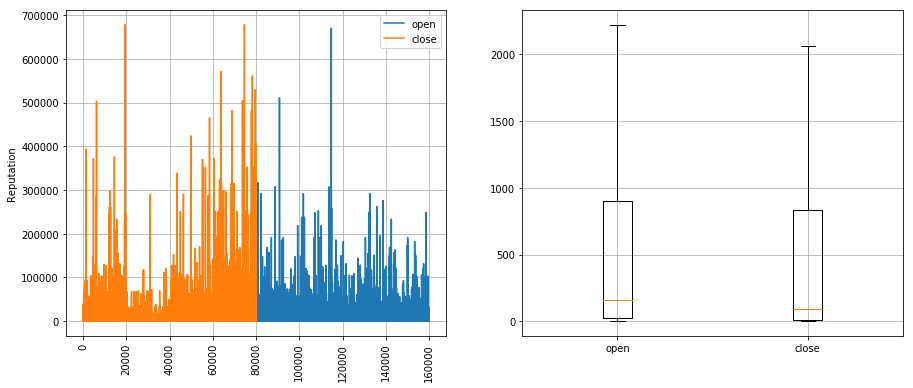

In [45]:
plt.figure(figsize=(15,6))

plt.title('General Trend in User\'s Reputation')
plt.subplot(1,2,1)
plt.plot(openData['Reputation'], label = 'open')
plt.plot(closeData['Reputation'], label = 'close')
plt.xticks(rotation='vertical')
plt.ylabel('Reputation')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.boxplot([openData['Reputation'],closeData['Reputation']], showfliers = False, labels = ['open', 'close'])
plt.grid(True)

plt.show()

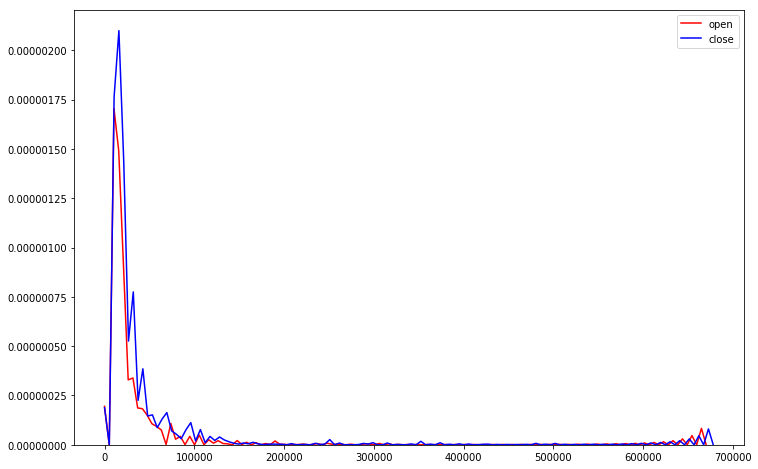

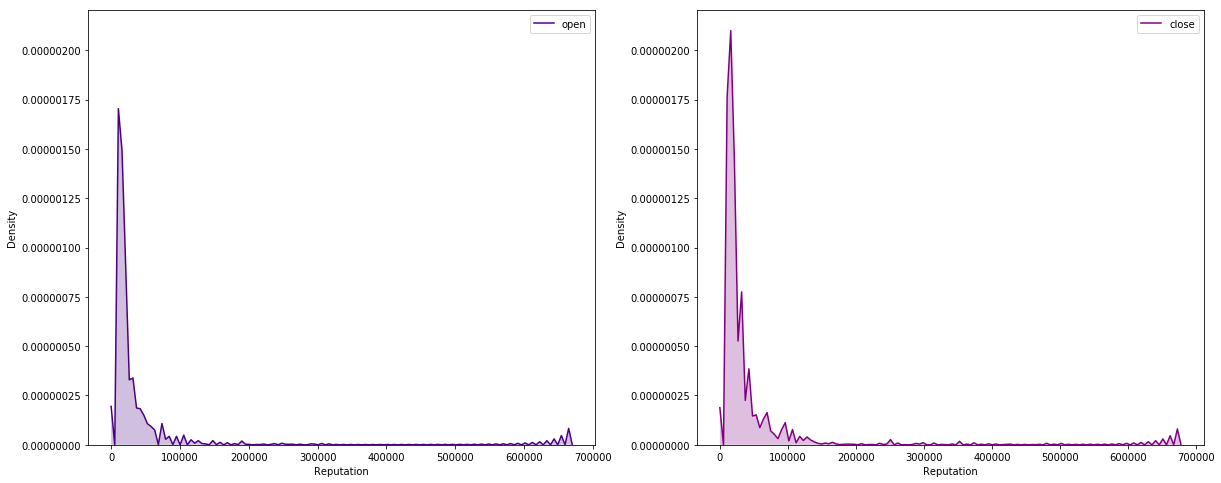

In [46]:
plt.figure(figsize=(12,8))
sb.kdeplot(openData['Reputation'], label = 'open', color = 'r')
sb.kdeplot(closeData['Reputation'], label = 'close', color = 'b')
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(openData['Reputation'], label = 'open', shade = True, color='indigo')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(closeData['Reputation'], label = 'close', shade = True,color='purple')
plt.ylabel('Density')
plt.xlabel('Reputation')

plt.show()

					No. of Questions vs User's Reputation



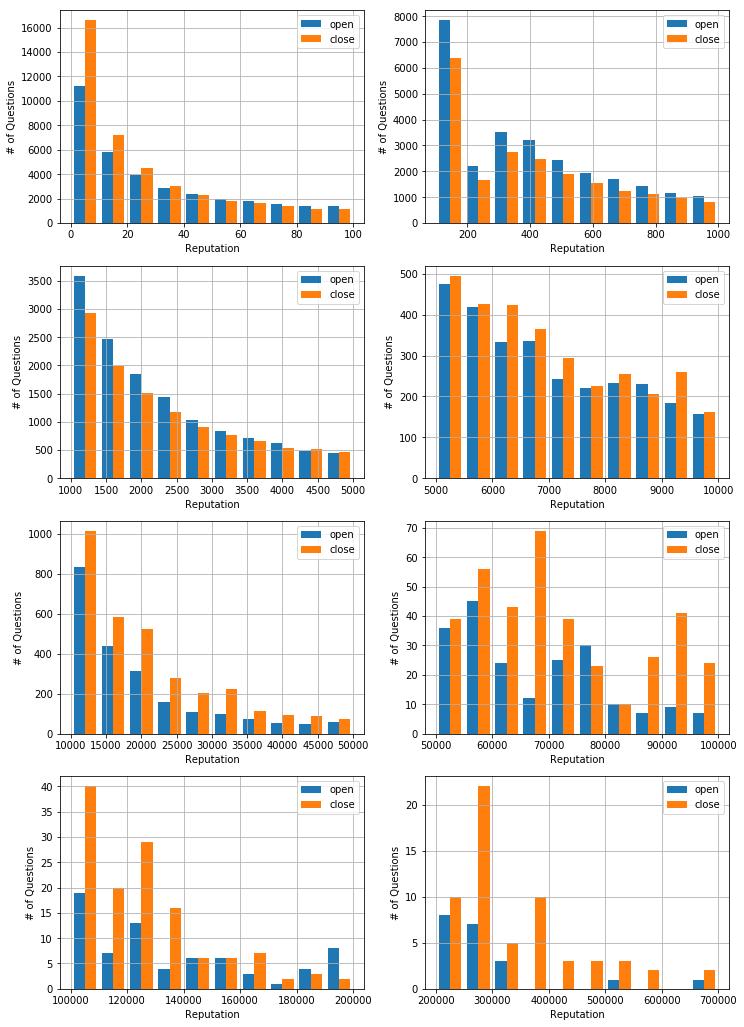

In [47]:
def hist_plot_range(min_value, max_value, col):
    """ To plot histogram using the 'col' field of Dataset for the values in the range 'min_value' - 'max_value' """
    plt.hist([openData[col],closeData[col]], range=(min_value, max_value), label = ['open', 'close'])
    plt.xlabel(col)
    plt.ylabel('# of Questions')
    plt.grid(True)
    plt.legend()
  
print('\t\t\t\t\tNo. of Questions vs User\'s Reputation\n')

plt.figure(figsize = (12,18))
range_list = [(0,100),(100,1000),(1000,5000),(5000,10000),(10000,50000),(50000,100000),(100000,200000),(200000,700000)]

for i in range(8):
    plt.subplot(4, 2, i+1)
    min_val, max_val = range_list[i]
    hist_plot_range(min_val, max_val, 'Reputation')
    
plt.show()

# No. of close Questions < open Questions only when User Reputation is in range (40, approx. 4250) or (180000, 200000).

### 2. Experience

In [48]:
max_exp_o = np.max(openData['experienceInTime'])
min_exp_o = np.min(openData['experienceInTime'])
avg_exp_o = np.mean(openData['experienceInTime'])
max_exp_c = np.max(closeData['experienceInTime'])
min_exp_c = np.min(closeData['experienceInTime'])
avg_exp_c = np.mean(closeData['experienceInTime'])

print('Value\t\tOpen\t\tClose')
print('Maximum\t\t' + str(max_exp_o) + '\t\t' + str(max_exp_c))
print('Minimum\t\t' + str(min_exp_o) + '\t\t' + str(min_exp_c))
print('Average\t\t' + str(avg_exp_o) + '\t' + str(avg_exp_c))
print('Mode\t\t' + str(stat.mode(openData['experienceInTime'])) + '\t\t' + str(stat.mode(closeData['experienceInTime'])))
print('Median\t\t' + str(stat.median(openData['experienceInTime'])) + '\t\t' + str(stat.median(closeData['experienceInTime'])))

Value		Open		Close
Maximum		2842		3717
Minimum		-261		-660
Average		585.7366001133715	433.9379746993831
Mode		0		0
Median		410		194


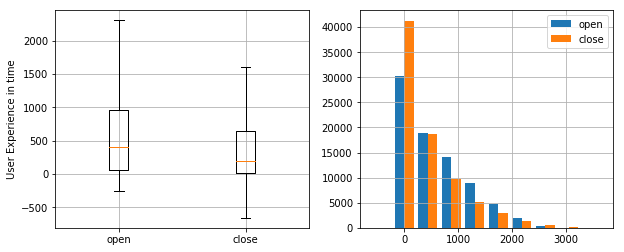

In [49]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.boxplot([openData['experienceInTime'], closeData['experienceInTime']], labels = ['open', 'close'], showfliers = False)
plt.ylabel('User Experience in time')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist([openData['experienceInTime'],closeData['experienceInTime']], label = ['open', 'close'])
plt.legend()
plt.grid(True)

plt.show()

8792
194


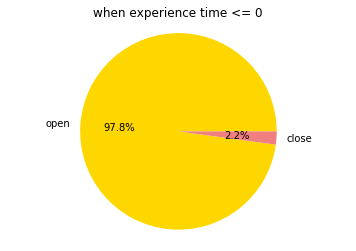

34675
42291


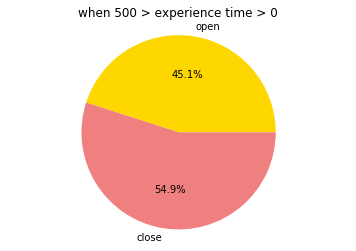

35918
1654


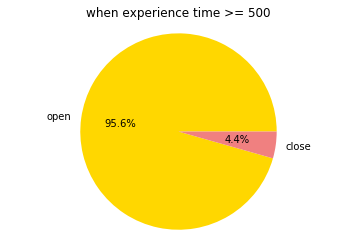

In [56]:
exptime_o_lt = openData[openData.experienceInTime <= 0]
print(exptime_o_lt.shape[0])

exptime_c_lt = closeData[closeData.punctuationCount <= 0]
print(exptime_c_lt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [exptime_o_lt.shape[0], exptime_c_lt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when experience time <= 0')
plt.axis('equal')
plt.show()

#-------

exptime_o_bet_0_500 = openData[(openData.experienceInTime > 0) & (openData.experienceInTime < 500)]
print(exptime_o_bet_0_500.shape[0])

exptime_c_bet_0_500 = closeData[(closeData.experienceInTime > 0) & (closeData.experienceInTime < 500)]
print(exptime_c_bet_0_500.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [exptime_o_bet_0_500.shape[0], exptime_c_bet_0_500.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when 500 > experience time > 0')
plt.axis('equal')
plt.show()

#--------

exptime_o_gt500 = openData[openData.experienceInTime >= 500]
print(exptime_o_gt500.shape[0])

exptime_c_gt500 = closeData[closeData.punctuationCount >= 500]
print(exptime_c_gt500.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [exptime_o_gt500.shape[0], exptime_c_gt500.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when experience time >= 500')
plt.axis('equal')
plt.show()

### 3. Upvotes

In [57]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Upvotes'])) + '\t\t\t' + str(max(close_data['Upvotes'])))
print('Minimum\t\t' + str(min(open_data['Upvotes'])) + '\t\t\t' + str(min(close_data['Upvotes'])))
print('Average\t\t' + str(np.mean(open_data['Upvotes'])) + '\t' + str(np.mean(close_data['Upvotes'])))
print('Mode\t\t' + str(stat.mode(open_data['Upvotes'])) + '\t\t\t' + str(stat.mode(close_data['Upvotes'])))
print('Median\t\t' + str(stat.median(open_data['Upvotes'])) + '\t\t\t' + str(stat.median(close_data['Upvotes'])))

Value		Open			Close
Maximum		46408			29505
Minimum		0			0
Average		176.26096566770008	165.7820750539658
Mode		0			0
Median		14.0			8.0


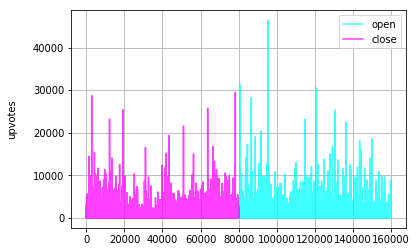

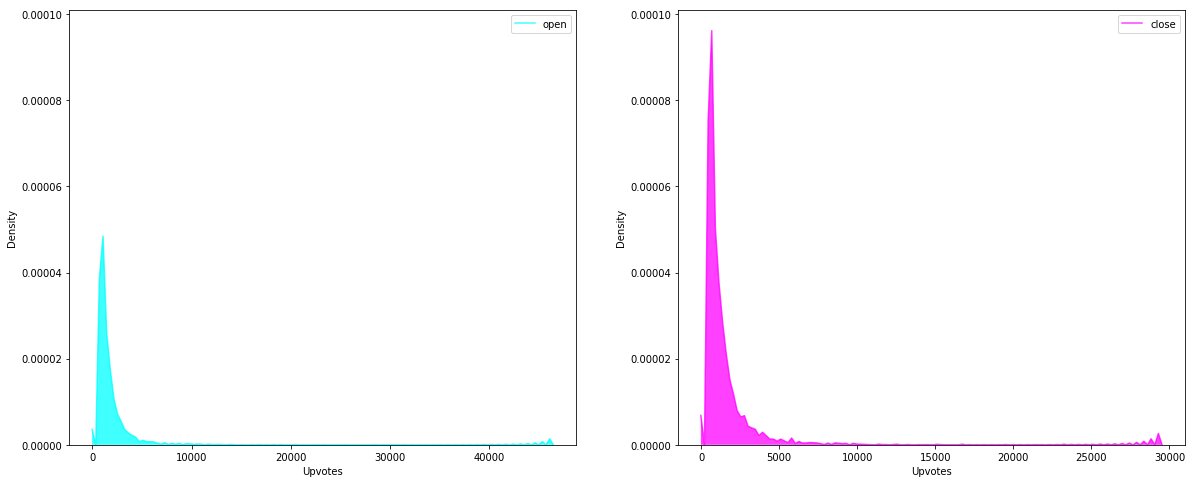

In [58]:
plt.figure()
plt.plot(open_data['Upvotes'], label = 'open', color='cyan', alpha=0.75)
plt.plot(close_data['Upvotes'], label = 'close', color='magenta', alpha=0.75)
plt.ylabel('upvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (20,8))

ax = plt.subplot(1,2,1)
sb.kdeplot(open_data['Upvotes'], label = 'open', shade = True, color='cyan', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(close_data['Upvotes'], label = 'close', shade = True, color='magenta', alpha=0.75)
plt.ylabel('Density')
plt.xlabel('Upvotes')

plt.show()

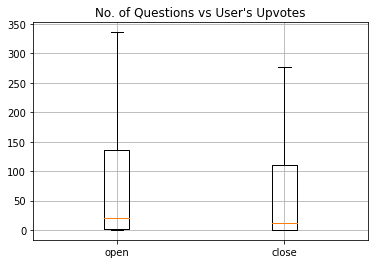

In [59]:
plt.figure()
plt.boxplot([openData['Upvotes'], closeData['Upvotes']], labels = ['open', 'close'], showfliers = False)
plt.title('No. of Questions vs User\'s Upvotes')
plt.grid(True)
plt.show()


65372
66546


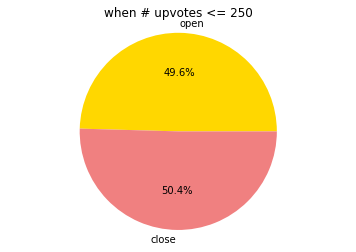

14013
13373


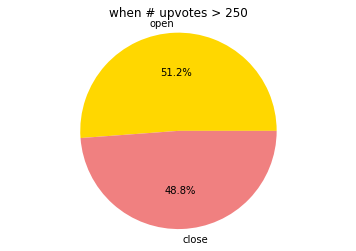

In [63]:
upv_o_lt = openData[openData.Upvotes <= 250]
print(upv_o_lt.shape[0])

upv_c_lt = closeData[closeData.Upvotes <= 250]
print(upv_c_lt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [upv_o_lt.shape[0], upv_c_lt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when # upvotes <= 250')
plt.axis('equal')
plt.show()

#----------

upv_o_gt = openData[openData.Upvotes > 250]
print(upv_o_gt.shape[0])

upv_c_gt = closeData[closeData.Upvotes > 250]
print(upv_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [upv_o_gt.shape[0], upv_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when # upvotes > 250')
plt.axis('equal')
plt.show()

### 4. Downvotes

In [64]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(open_data['Downvotes'])) + '\t\t\t' + str(max(close_data['Downvotes'])))
print('Minimum\t\t' + str(min(open_data['Downvotes'])) + '\t\t\t' + str(min(close_data['Downvotes'])))
print('Average\t\t' + str(np.mean(open_data['Downvotes'])) + '\t' + str(np.mean(close_data['Downvotes'])))
print('Mode\t\t' + str(stat.mode(openData['Downvotes'])) + '\t\t\t' + str(stat.mode(closeData['Downvotes'])))
print('Median\t\t' + str(stat.median(openData['Downvotes'])) + '\t\t\t' + str(stat.median(closeData['Downvotes'])))

Value		Open			Close
Maximum		24219			66837
Minimum		0			0
Average		17.81593753588242	17.910970277301157
Mode		0			0
Median		0			0


In [ ]:
plt.figure()

plt.plot(open_data['Downvotes'], label = 'open')
plt.plot(close_data['Downvotes'], label = 'close')
plt.ylabel('downvotes\n')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize = (18,6))
ax = plt.subplot(1,2,1)
sb.kdeplot(open_data['Downvotes'], label = 'open', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.subplot(1,2,2, sharey = ax)
sb.kdeplot(close_data['Downvotes'], label = 'close', shade = True)
plt.ylabel('Density')
plt.xlabel('Downvotes')

plt.show()

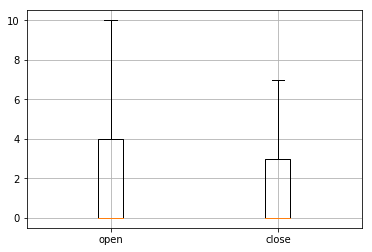

In [66]:
plt.figure()
plt.boxplot([openData['Downvotes'], closeData['Downvotes']], labels = ['open', 'close'], showfliers = False)
plt.grid(True)
plt.show()

18656
71555


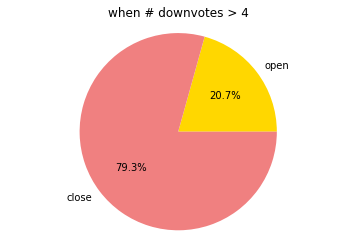

In [68]:
downv_o_gt = openData[openData.Downvotes > 4]
print(downv_o_gt.shape[0])

downv_c_gt = closeData[closeData.punctuationCount > 4]
print(downv_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [downv_o_gt.shape[0], downv_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when # downvotes > 4')
plt.axis('equal')
plt.show()

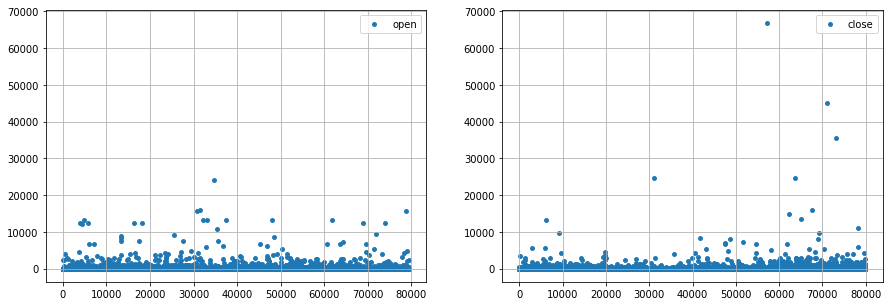

In [76]:
plt.figure(figsize=(15,5))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(openData['Downvotes'])), openData['Downvotes'], label = 'open', s = 15)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(closeData['Downvotes'])), closeData['Downvotes'], label = 'close', s = 15)
plt.legend()
plt.grid(True)

plt.show()

### 5. Views

In [75]:
print('Value\t\tOpen\t\t\tClose')
print('Maximum\t\t' + str(max(openData['Views'])) + '\t\t\t' + str(max(closeData['Views'])))
print('Minimum\t\t' + str(min(openData['Views'])) + '\t\t\t' + str(min(closeData['Views'])))
print('Average\t\t' + str(np.mean(openData['Views'])) + '\t' + str(np.mean(closeData['Views'])))
print('Mode\t\t' + str(stat.mode(openData['Views'])) + '\t\t\t' + str(stat.mode(closeData['Views'])))
print('Median\t\t' + str(stat.median(openData['Views'])) + '\t\t\t' + str(stat.median(closeData['Views'])))

Value		Open			Close
Maximum		133100			157537
Minimum		0			0
Average		261.45080304843486	339.94216644352406
Mode		1			1
Median		40			30


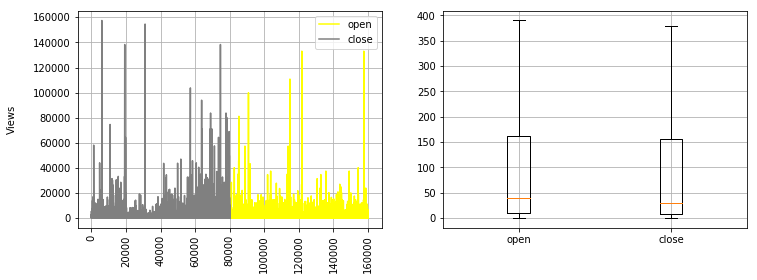

In [74]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(openData['Views'], label = 'open', color='yellow')
plt.plot(closeData['Views'], label = 'close', color='grey')
plt.ylabel('Views\n')
plt.legend()
plt.grid(True)
plt.xticks(rotation='vertical')

plt.subplot(1,2,2)
plt.boxplot([openData['Views'],closeData['Views']], labels = ['open', 'close'], showfliers = False)
plt.grid(True)

plt.show()

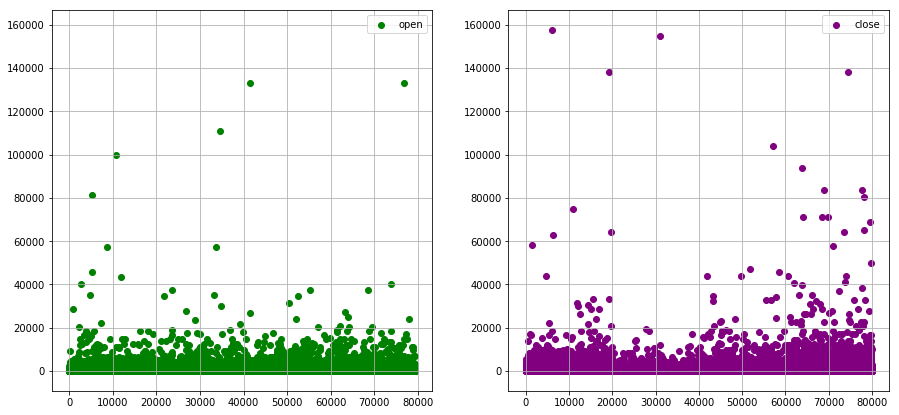

In [73]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1,2,1)
plt.scatter(range(len(openData['Views'])), openData['Views'], label = 'open', color='green')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2, sharey = ax1)
plt.scatter(range(len(closeData['Views'])), closeData['Views'], label = 'close', color='purple')
plt.legend()
plt.grid(True)

plt.show()

26059
24780


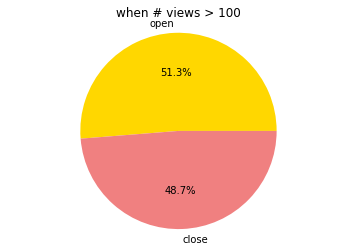

In [72]:
views_o_gt = openData[openData.Views > 100]
print(views_o_gt.shape[0])

views_c_gt = closeData[closeData.Views > 100]
print(views_c_gt.shape[0])

plt.figure()
labels = 'open', 'close'
sizes = [views_o_gt.shape[0], views_c_gt.shape[0]]
colors = ['gold', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.title('when # views > 100')
plt.axis('equal')
plt.show()